# Statistische Auswertung der Bürgermeister*innenwahlen in BW

In [15]:
from itertools import islice
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('../bbw-dataset.csv', sep=';')

# peek into the structure
df.head(2)

,gemeinde,art,buergermeister,partei,zustimmung,einwohner,wahlberechtigte,wahlbeteiligung,volltext,link
0,Aach,Buergermeister,Manfred Ossola,parteilos,0.9742,2315,1824,0.7039,In Aach (Landkreis Konstanz) fand am 24. Septe...,https://www.staatsanzeiger.de/staatsanzeiger/w...
1,Aalen,Oberbuergermeister,Thilo Rentschler,SPD,0.6050,66096,51699,0.4360,In Aalen (Ostalbkreis) haben die Bürger am 21....,https://www.staatsanzeiger.de/staatsanzeiger/w...


In [17]:
# Definitions
parteien = ['parteilos', 'CDU',  'SPD','Freie Wähler', 'FDP', 'Grüne']
colors = ['blue', 'black', 'red', 'orange', 'yellow', 'green']

## Perteizugehörigkeit



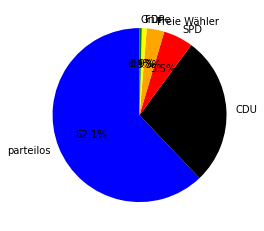

In [18]:
values = []
for partei in parteien:
    values.append(df[['partei']].apply(pd.value_counts, axis=0).loc[partei, 'partei'])

plt.pie(values, labels=parteien, autopct='%1.1f%%', startangle=90, colors=colors);


## Parteizugehörigkeit normalisiert nach Einwohneranzahl

Welcher Anteil der Bürger\*innen werden von Bürgermeister*innen einer gewissen Partei regiert



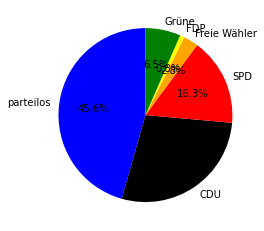

In [19]:
einwohner = []

for partei in parteien:
    einwohner.append(df[df["partei"]==partei].sum()["einwohner"])

plt.pie(einwohner, labels=parteien, autopct='%1.1f%%', startangle=90, colors=colors);

## Histogramm der Zustimmung die der Wahlsieger bekam

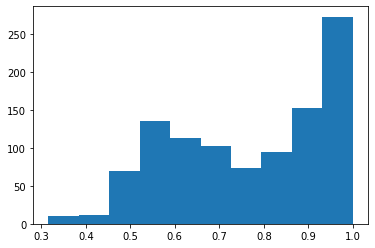

In [20]:
plt.hist(df['zustimmung'], bins=10);

## Histogramm der Wahlbeteiligung

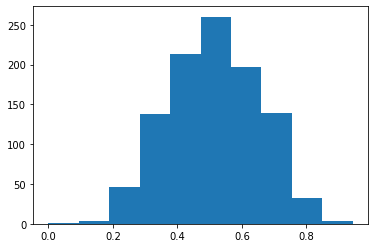

In [21]:
plt.hist(df['wahlbeteiligung']);

## Korrelation von Zustimmung und Wahlbeteiligung

In [22]:
df[['zustimmung', 'wahlbeteiligung']].corr()

,zustimmung,wahlbeteiligung
zustimmung,1.000000,-0.460465
wahlbeteiligung,-0.460465,1.000000


## Scatter Plot von Wahlbeteiligung über Zustimmung

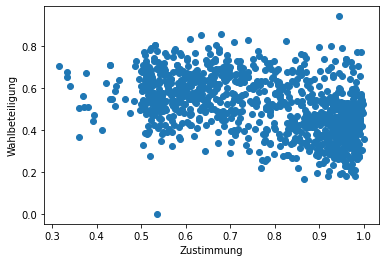

In [23]:
plt.scatter(df['zustimmung'], df['wahlbeteiligung'])
plt.xlabel('Zustimmung')
plt.ylabel('Wahlbeteiligung');


## Weitere Analysen zu Wahlbeteiligung und Zustimmung

In [24]:
threshold = 0.97
print(f"Gemeinden mit Zustimmung => {threshold}: {len(df['wahlbeteiligung'][df['zustimmung'] >= threshold])}")
print(f"durchschnittliche Wahlbeteiligung: {df['wahlbeteiligung'][df['zustimmung'] >= threshold].mean()}")
print(f"durchschnittliche Einwohnerzahl: {df['einwohner'][df['zustimmung'] >= threshold].mean()}")
print(f"median Einwohnerzahl: {df['einwohner'][df['zustimmung'] >= threshold].median()}")
print(f"Einwohnerzahl der größten Gemeinde: {df['einwohner'][df['zustimmung'] >= threshold].max()}")

Gemeinden mit Zustimmung => 0.97: 124
durchschnittliche Wahlbeteiligung: 0.4430838709677419
durchschnittliche Einwohnerzahl: 7095.895161290323
median Einwohnerzahl: 4308.5
Einwohnerzahl der größten Gemeinde: 54047


In [25]:
df[df['wahlbeteiligung'] > 0.9]

,gemeinde,art,buergermeister,partei,zustimmung,einwohner,wahlberechtigte,wahlbeteiligung,volltext,link
824,Schuttertal,Buergermeister,Carsten Gabbert,Grüne,0.9442,3250,2548,0.944,In Schuttertal (Ortenaukreis) haben die Bürger...,https://www.staatsanzeiger.de/staatsanzeiger/w...


## Häufigste Vornamen

In [26]:
namen = df['buergermeister'].values.tolist()
vornamen = []

for name in namen:
    name = str(name)
    if name.lower().startswith('dr'):
        vornamen.append(name.split(' ')[1])
    else:
        vornamen.append(name.split(' ')[0])


In [27]:
from collections import Counter

counter = Counter(vornamen)

counter = {k: v for k, v in sorted(counter.items(), reverse=True, key=lambda item: item[1])}


In [28]:
top_n = 10

abs_share_in_top_n = 0

for key, value in list(islice(counter.items(), top_n)):
    abs_share_in_top_n += value

abs_share_in_top_n
rel_share_in_top_n = abs_share_in_top_n / len(vornamen) * 100

print(f'Die Top {top_n} Vornamen machen {abs_share_in_top_n} Personen aus. {rel_share_in_top_n:.02f}%.')
print(f'Die Top {top_n} Vornamen sind:')
for name in list(counter.keys())[:10]:
    print(f'\t\t{name}')

Die Top 10 Vornamen machen 264 Personen aus. 25.53%.
Die Top 10 Vornamen sind:
		Michael
		Thomas
		Martin
		Andreas
		Jürgen
		Klaus
		Markus
		Stefan
		Frank
		Matthias


In [29]:
print(f'Liste aller Vornamen nach Häufigkeit, mit einer Häufigkeit größer eins')

for key, val in counter.items():
    if val < 2:
        break
    print(f'{key}: {val}')


Liste aller Vornamen nach Häufigkeit, mit einer Häufigkeit größer eins
Michael: 45
Thomas: 44
Martin: 27
Andreas: 24
Jürgen: 23
Klaus: 22
Markus: 22
Stefan: 19
Frank: 19
Matthias: 19
Peter: 18
Jochen: 16
Ralf: 16
Bernd: 16
Christian: 15
Daniel: 14
Joachim: 13
Christoph: 13
Wolfgang: 13
Johannes: 12
Rainer: 12
Roland: 11
Jörg: 10
Oliver: 10
Armin: 9
Uwe: 9
Alexander: 9
Tobias: 9
Volker: 8
Manfred: 7
Florian: 7
Bernhard: 7
Norbert: 7
Robert: 7
Dieter: 7
Steffen: 6
Gerhard: 6
Holger: 6
Walter: 6
Josef: 6
Hans: 6
Marcus: 6
Jens: 6
Dirk: 6
Ulrich: 6
Karl: 5
Carsten: 5
Timo: 5
Dietmar: 5
Achim: 5
Günter: 5
Philipp: 5
Christof: 5
Sven: 5
Mario: 5
Benjamin: 5
Siegfried: 5
Werner: 5
Elmar: 4
Patrick: 4
Fritz: 4
Helmut: 4
Simon: 4
Petra: 4
Bruno: 4
Stephan: 4
Rudolf: 4
Karlheinz: 4
Marco: 4
Heiko: 4
Gerd: 4
Jan: 4
Georg: 4
Thilo: 3
Clemens: 3
Reinhold: 3
Sabine: 3
Sebastian: 3
Simone: 3
Roman: 3
Franz: 3
Benedikt: 3
Gunter: 3
Hans-Peter: 3
Erik: 3
Ferdinand: 3
Sascha: 3
Johann: 3
Julian: 3
Heike

In [30]:
# unset the dataframe
df = None